# PROJECT: PHASE 1

# 1. Business Understanding
The goal of this analysis is to evaluate the risk profiles of different aircraft 
to help the aviation company decide which aircraft to purchase.

We will:
- Understand the incident and accident data.
- Identify the highest and lowest risk aircraft.
- Provide actionable recommendations based on risk scores.

# 2. Data Understanding
Our dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [224]:
# importing the necessary libraries
import pandas as pd
import numpy as np

# loading the data
df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')
pd.set_option('display.max_columns', None)
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_20000\1609806476.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [225]:
df.shape

(88889, 31)

In [226]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

##  Assessing data quality

In [228]:
# checking for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [229]:
# checking for duplicates
df.duplicated().sum()

0

In [230]:
# A statistical summary of our dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Exploring data

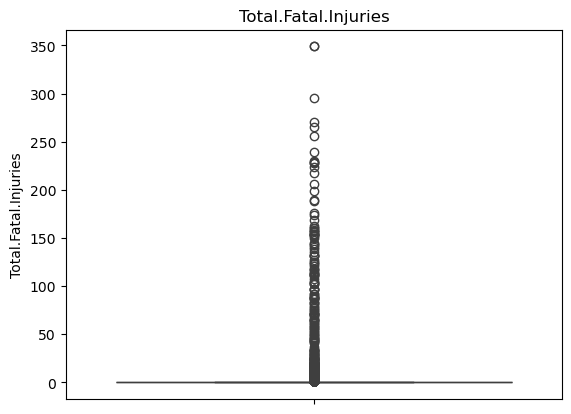

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# boxplot for total fatal injuries

sns.boxplot(df['Total.Fatal.Injuries'])

plt.title('Total.Fatal.Injuries')
plt.show()



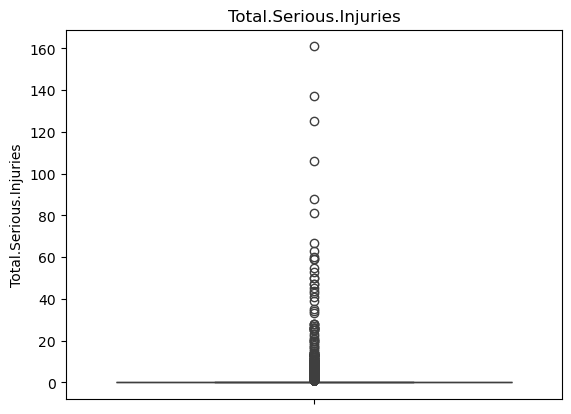

In [232]:
#boxplot for Total serious injuries

sns.boxplot(df['Total.Serious.Injuries'])
plt.title('Total.Serious.Injuries')
plt.show()


There are a few outliers in both the Total Fatal Injuries and Total Serious Injuries column but we will leave them since the columns are important in our analysis

# 3. Data Preparation

In [233]:

df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_20000\448570792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_20000\448570792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [234]:
# checking the percentage of null values for each column
df.isna().sum()*100/len(df)

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          5

In [235]:
# Dropping columns with a high percentage of null values (more than 40–50%)
df.drop(columns=['Schedule','Latitude', 'Longitude', 'FAR.Description', 'Air.carrier'], inplace=True)

In [236]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [237]:
# dropping unnecessary columns
dropped_columns = ['Airport.Code', 'Registration.Number', 'Amateur.Built', 'Publication.Date', 'Airport.Name', 'Report.Status', 'Accident.Number']
df.drop(dropped_columns, axis=1, inplace=True)

In [238]:
# extracting the unique values in the column
df['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object)

In [239]:
# dropping rows with null values in 'Location' column
df.dropna(subset=['Location'], axis=0, inplace=True)

In [240]:
# filling null values with the mode in 'Country' column
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Angola',
       'Germany', 'Korea, Republic Of', 'American Samoa', 'PACIFIC OCEAN',
       'Canada', 'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles',
       'Iceland', 'Greece', 'Guam', 'Australia', 'CARIBBEAN SEA',
       'West Indies', 'Japan', 'Philippines', 'Venezuela', 'Bermuda',
       'San Juan Islands', 'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Portugal',
       'Malaysia', 'Turks And Caicos Islands', 'Northern Mariana Islands',
       'Dominican Republic', 'Suriname', 'Honduras', 'Congo', 'Belize',
       'Guatemala', 'France', 'St Vincent And The Grenadines', 'Haiti',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Senegal', 'Barbados', 'BLOCK 651A', 'Brazil', 'Mauritius',
       'Argentina', 'K

In [241]:
# replacing null values with an already existing category 'MISSING'
df['Country'] = df['Country'].fillna('MISSING')

In [242]:
# extracting the unique values in the column
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [243]:
# replacing null values with an already existing category 'Unavailable'
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')

In [244]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [245]:
# dropping rows with null values in 'Aircraft.damage' column
df.dropna(subset=['Aircraft.damage'], inplace=True)

In [246]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54827
Make                         45
Model                        72
Number.of.Engines          4888
Engine.Type                5876
Purpose.of.flight          4562
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3341
Broad.phase.of.flight     25396
dtype: int64

In [247]:
# extracting the unique values in the column
df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [248]:
# extracting the unique values in the column
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'GREG HOBBS',
       'JAMES R DERNOVSEK', 'ORLICAN S R O'], dtype=object)

In [249]:
# filling the null values in 'Aircraft.Category' column with an already existing category
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unavailable')

In [250]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unavailable,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unavailable,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unavailable,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unavailable,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unavailable,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach


In [251]:
# dropping rows with null values in 'Make' column
df.dropna(subset=['Make'], axis=0, inplace=True)

In [252]:
df['Make'] = df['Make'].str.upper()

In [253]:
df.isna().sum()*100/len(df)

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Make                       0.000000
Model                      0.052567
Number.of.Engines          5.673734
Engine.Type                6.824368
Purpose.of.flight          5.299924
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          3.870101
Broad.phase.of.flight     29.626774
dtype: float64

In [254]:
# dropping rows with null values in 'Model' column
df.dropna(subset=['Model'], axis=0, inplace=True)

In [255]:
# filling null values with the mode in 'Number.of.Engines' column
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])


In [256]:
df.isna().sum()*100/len(df)

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Make                       0.000000
Model                      0.000000
Number.of.Engines          0.000000
Engine.Type                6.808088
Purpose.of.flight          5.292193
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          3.859280
Broad.phase.of.flight     29.623656
dtype: float64

In [257]:
# extracting the unique values in the column
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [258]:
# filling the null values in 'Engine.Type' column with an already existing category
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')

In [259]:
df.isna().sum()*100/len(df)

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Make                       0.000000
Model                      0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          5.292193
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          3.859280
Broad.phase.of.flight     29.623656
dtype: float64

In [260]:
# extracting the unique values in the column
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [261]:
# filling the null values in 'Purpose.of.flight' column with an already existing category
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')

In [262]:
df.isna().sum()*100/len(df)

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Make                       0.000000
Model                      0.000000
Number.of.Engines          0.000000
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          3.859280
Broad.phase.of.flight     29.623656
dtype: float64

In [263]:
# extracting the unique values in the column
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [264]:
# filling the null values in 'Purpose.of.flight' column with an already existing category
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK')

In [265]:
# converting all values in 'Weather.Condition' column to uppercase
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

In [266]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [267]:
# extracting the unique values in the column
df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [268]:
# filling the null values in 'Purpose.of.flight' column with an already existing category
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

In [269]:
df.isna().sum()*100/len(df)

Event.Id                  0.0
Investigation.Type        0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Aircraft.Category         0.0
Make                      0.0
Model                     0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Broad.phase.of.flight     0.0
dtype: float64

In [270]:
# replacing the '.' with underscores 
df.columns = df.columns.str.replace('.', '_')

In [271]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight'],
      dtype='object')

In [272]:
df.head()

,Event_Id,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unavailable,STINSON,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unavailable,PIPER,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unavailable,CESSNA,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unavailable,ROCKWELL,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unavailable,CESSNA,501,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach


In [273]:
# checking the data type
df['Number_of_Engines'].dtype

dtype('float64')

In [274]:
# converting the data types of the numeric columns
df['Number_of_Engines'] = df['Number_of_Engines'].astype(int)
df['Total_Fatal_Injuries'] = df['Total_Fatal_Injuries'].astype(int)
df['Total_Serious_Injuries'] = df['Total_Serious_Injuries'].astype(int)
df['Total_Minor_Injuries'] = df['Total_Minor_Injuries'].astype(int)
df['Total_Uninjured'] = df['Total_Uninjured'].astype(int)


In [275]:
# checking the data types of the numeric columns
df['Number_of_Engines'].dtype
df['Total_Uninjured'].dtype

dtype('int32')

In [276]:
# creating a new column 'Total_Injuries' to aid in analysis
df['Total_Injuries'] = df['Total_Fatal_Injuries']+df['Total_Serious_Injuries']+df['Total_Minor_Injuries']
df.head()


,Event_Id,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Total_Injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unavailable,STINSON,108-3,1,Reciprocating,Personal,2,0,0,0,UNK,Cruise,2
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unavailable,PIPER,PA24-180,1,Reciprocating,Personal,4,0,0,0,UNK,Unknown,4
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unavailable,CESSNA,172M,1,Reciprocating,Personal,3,0,0,0,IMC,Cruise,3
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unavailable,ROCKWELL,112,1,Reciprocating,Personal,2,0,0,0,IMC,Cruise,2
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unavailable,CESSNA,501,1,Unknown,Personal,1,2,0,0,VMC,Approach,3


# 4. Analysis
##  Questions We Will Answer in This Analysis

We will answer the following key questions and many others to guide aircraft risk evaluation :

-  **What are the safest makes?**
-  **What are the safest models?**
-  **What are the most dangerous makes?**
   
  



In [277]:
 df['Make'].value_counts().tail(10)

Make
BAIR HELICOPTERS, INC.    1
SCOVIL                    1
MCKINNIS                  1
AERONCA-BUBECK IRVING     1
TRIKE                     1
AERO COMP INC             1
BURAK STANLEY A           1
COHEN                     1
KITCHENS                  1
ORLICAN S R O             1
Name: count, dtype: int64

## a) What are the most dangerous makes

C:\Users\user\AppData\Local\Temp\ipykernel_20000\1109058447.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_makes_df, x='count', y='Make', palette='viridis')


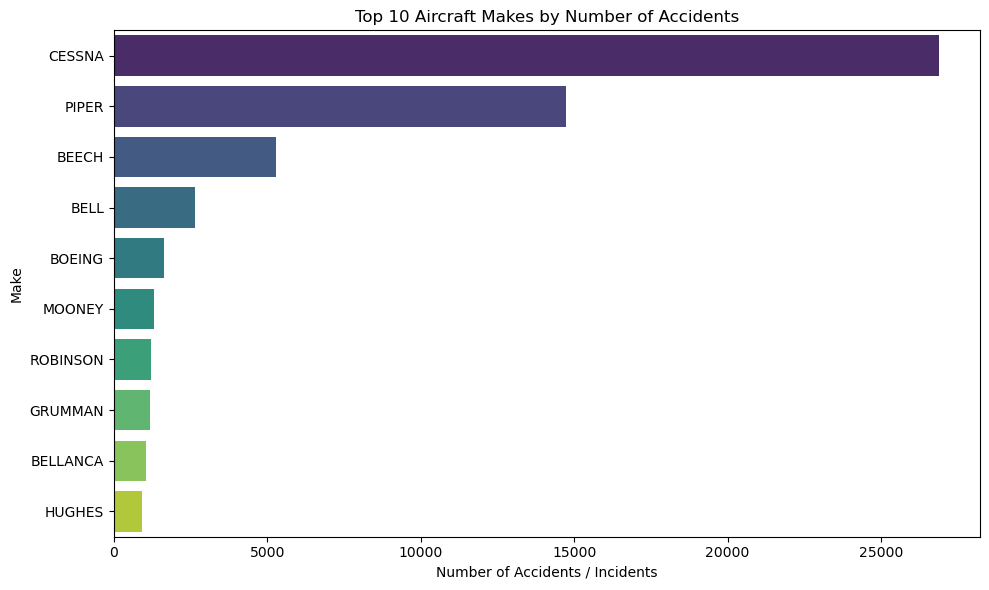

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_makes = df['Make'].value_counts().head(10)



# Convert to DataFrame for Seaborn
top_10_makes_df = top_10_makes.reset_index()
top_10_makes_df.columns = ['Make', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_makes_df, x='count', y='Make', palette='viridis')
plt.title("Top 10 Aircraft Makes by Number of Accidents")
plt.xlabel('Number of Accidents / Incidents')
plt.ylabel("Make")
plt.tight_layout()
plt.show()



Conclusion: The make CESSNA has been involved in the most accidents/incidents

## b) The Top 10 Aircraft Models by Number of Accidents

C:\Users\user\AppData\Local\Temp\ipykernel_20000\107024293.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_models_df, x='Model', y='count',palette='plasma' )


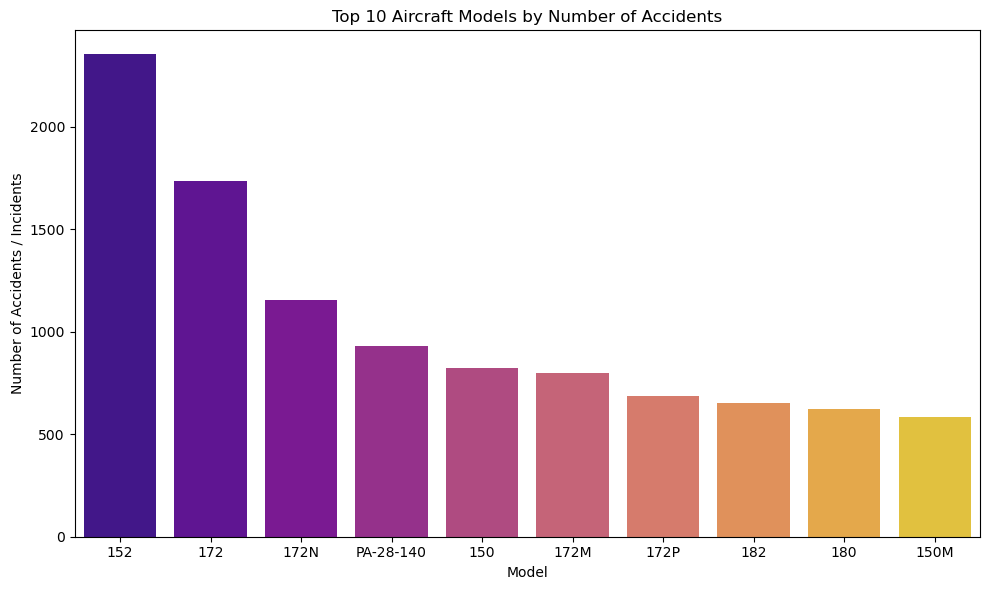

In [279]:
top_10_models = df['Model'].value_counts().head(10)



# Convert to DataFrame for Seaborn
top_10_models_df = top_10_models.reset_index()
top_10_models_df.columns = ['Model', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_models_df, x='Model', y='count',palette='plasma' )
plt.title("Top 10 Aircraft Models by Number of Accidents")
plt.xlabel('Model')
plt.ylabel('Number of Accidents / Incidents')
plt.tight_layout()
plt.show()

Conclusion: Model 152 has been involved in the most accidents/incidents.

## c) Accidents based on the number of engines

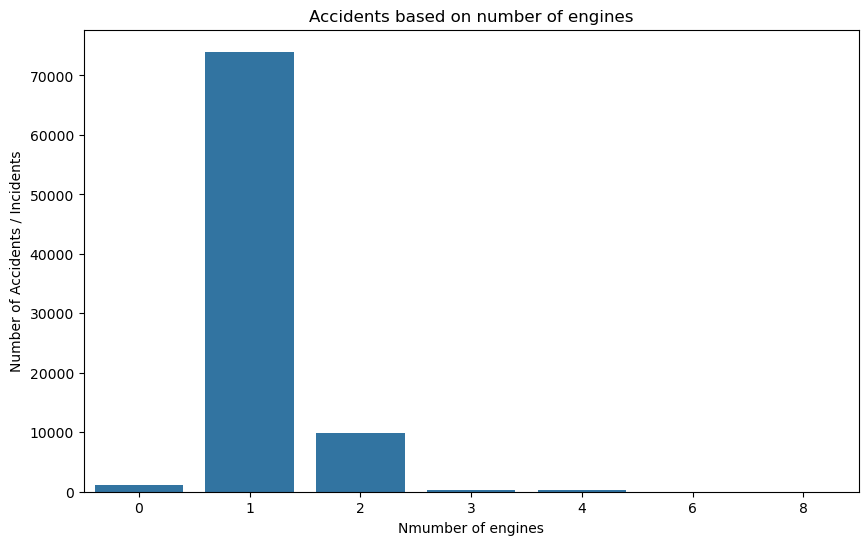

In [280]:
no_of_engines = df['Number_of_Engines'].value_counts()

# Convert to DataFrame for Seaborn
no_of_engines = df['Number_of_Engines'].value_counts()
no_of_engines_df = no_of_engines.reset_index()
no_of_engines.columns = ['Number_of_Engines', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=no_of_engines_df, x='Number_of_Engines', y='count')
plt.title('Accidents based on number of engines')
plt.xlabel('Nmumber of engines')
plt.ylabel('Number of Accidents / Incidents')
plt.show()

Conclusion: Aircrafts with a single engine were involved in the most accidents

## d) The Top 5 Aircraft Engine Types involved in the most Accidents

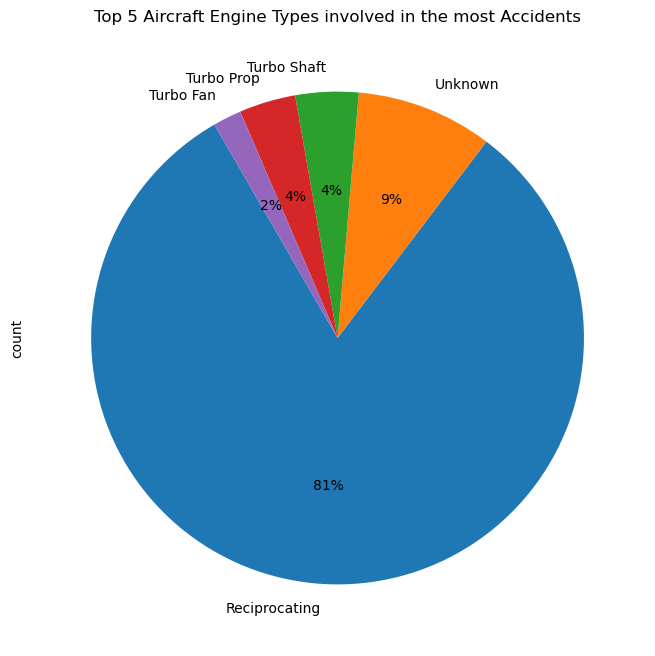

In [281]:
top_10_makes = df['Engine_Type'].value_counts().head(5)

top_10_makes.plot.pie(autopct='%.0f%%', figsize=(8,8), startangle=120)
plt.title('Top 5 Aircraft Engine Types involved in the most Accidents')
plt.show()



Conclusion: Reciprocating engine type was involved in the most accidents

## e) Total Fatal Injuries Based On Make

In [282]:
new_df = df.groupby('Make')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)

new_df = new_df.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_20000\3320960617.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df.head(), x='Make', y='Total_Fatal_Injuries', palette='viridis')


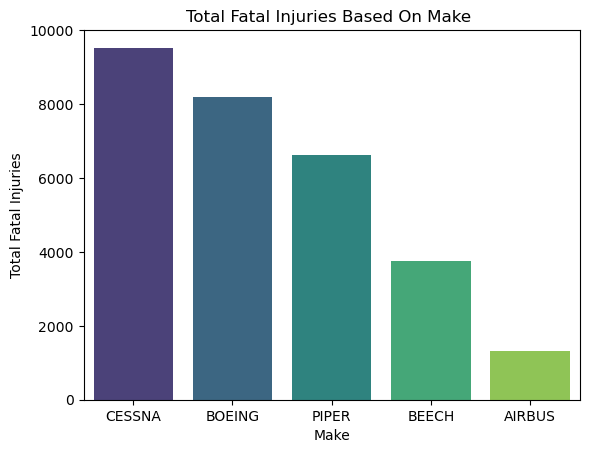

In [283]:
sns.barplot(data=new_df.head(), x='Make', y='Total_Fatal_Injuries', palette='viridis')
plt.title('Total Fatal Injuries Based On Make ')
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.show()

Conclusion: CESSNA, BOEING and PIPER lead the way in total fatal injuries

In [284]:
df2 = df.groupby('Make')['Total_Injuries'].sum().sort_values(ascending=False)

df2 = df2.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_20000\3604529874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2.head(6), x='Make', y='Total_Injuries', palette='viridis')


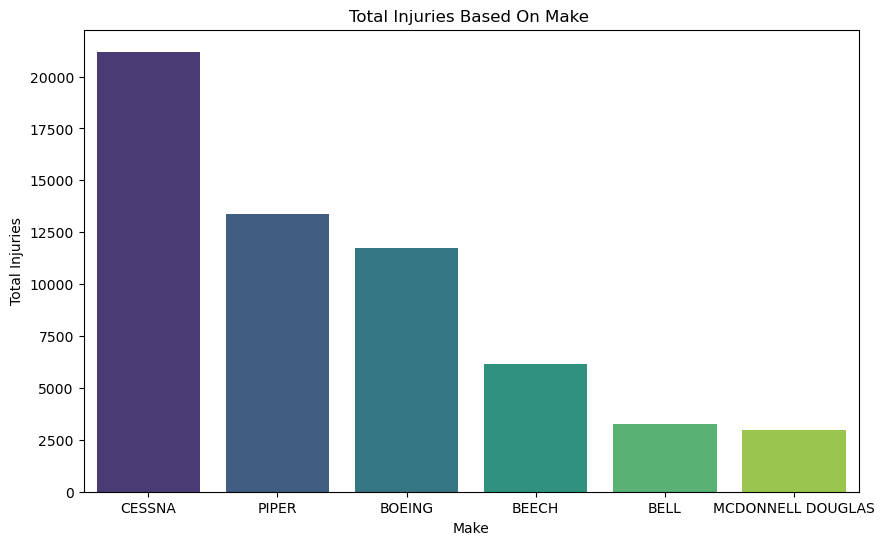

In [285]:
plt.figure(figsize=(10,6))
sns.barplot(data=df2.head(6), x='Make', y='Total_Injuries', palette='viridis')
plt.title('Total Injuries Based On Make ')
plt.xlabel('Make')
plt.ylabel('Total Injuries')
plt.show()

## f) Total Injuries Based On Model

In [286]:
df3 = df.groupby('Model')['Total_Injuries'].sum().sort_values(ascending=False)

df3 = df3.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_20000\1210560853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df3.head(7), x='Model', y='Total_Injuries', palette='plasma')


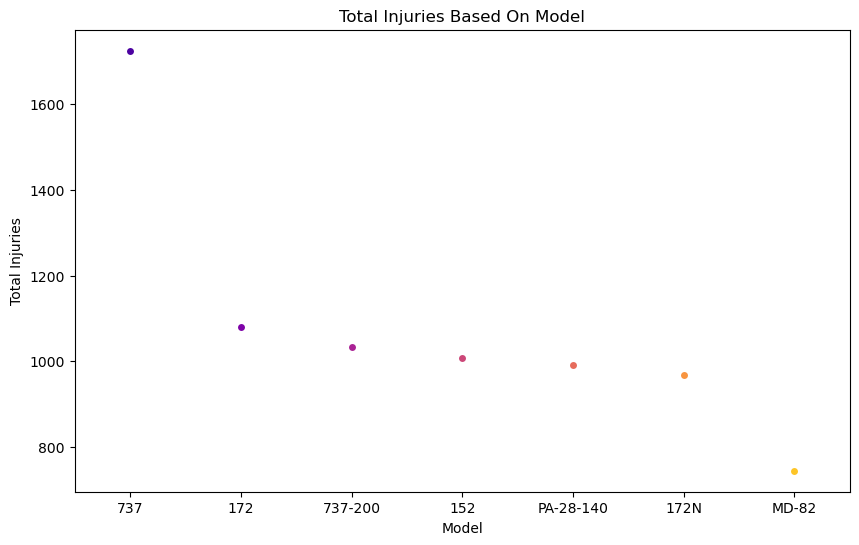

In [287]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df3.head(7), x='Model', y='Total_Injuries', palette='plasma')
plt.title('Total Injuries Based On Model')
plt.xlabel('Model')
plt.ylabel('Total Injuries')
plt.show()

## g) Number of Accidents/Incidents based on Purpose of flight

<Axes: ylabel='count'>

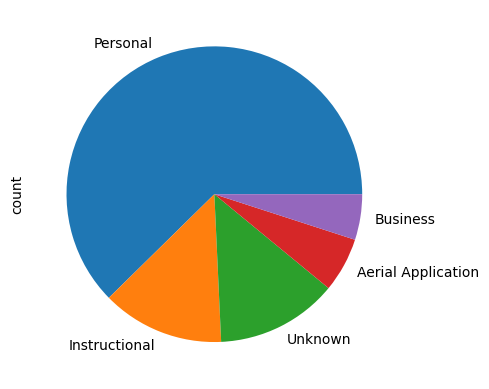

In [288]:
# Finding the count for the values in the column
df5 = df['Purpose_of_flight'].value_counts()

df5.head().plot.pie()

Conclusion: Personal flights dominate accident/incident reports and show higher average fatality/severity per accident.

## In which phase of flights are accidents most likely to occur

C:\Users\user\AppData\Local\Temp\ipykernel_20000\2049188019.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4.head(5), x='count', y='Broad_phase_of_flight', palette='viridis')


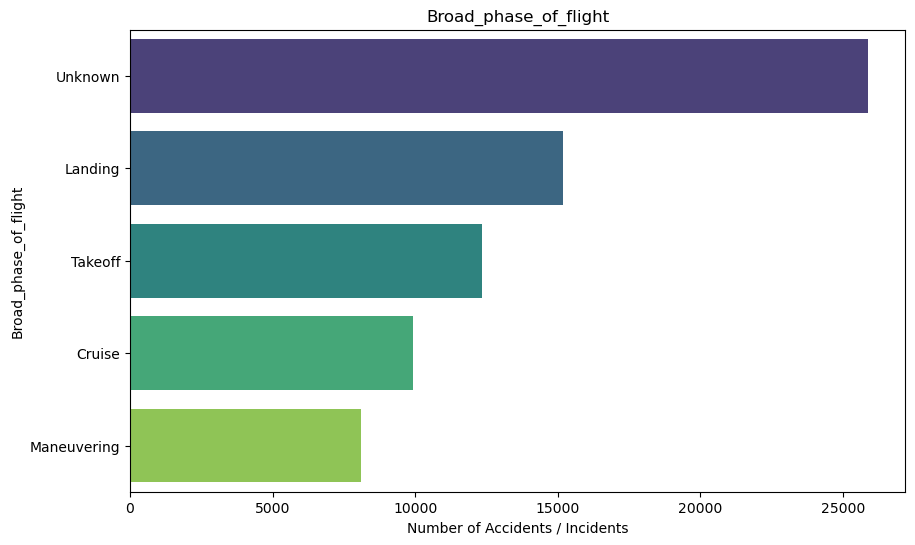

In [289]:
df4 = df['Broad_phase_of_flight'].value_counts()
df4 = df4.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df4.head(5), x='count', y='Broad_phase_of_flight', palette='viridis')
plt.title('Broad_phase_of_flight')
plt.xlabel('Number of Accidents / Incidents')
plt.ylabel('Broad_phase_of_flight')
plt.show()

 ## Weather conditions in which accidents/incidents leading to fatal injuries are most likely to occur

<Axes: xlabel='Weather_Condition', ylabel='Total_Fatal_Injuries'>

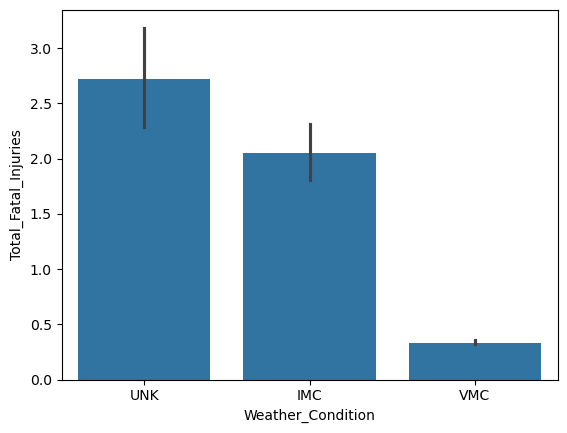

In [291]:
sns.barplot(x='Weather_Condition', y='Total_Fatal_Injuries', data=df)

Conclusion: Other than unknown weather conditions, Instrument Meteorological Conditions (where the pilot must rely on instruments to fly, rather than visual cues from outside the aircraft), led to the most fatal injuries.

# The safest aircraft makes

 
We are using Avg_Injuries predominantly for assessing the risk of each aircraft as it helps you compare fairly between aircraft that might have very different numbers of incidents.

In [293]:
# Group by Make only, compute mean and count of injuries
make_safety = (df.groupby('Make')['Total_Injuries'].agg(['mean', 'sum', 'count']).reset_index().rename(columns={'mean': 'Avg_Injuries', 'sum': 'Total_Injuries'}))

# Filter to makes with at least 10 incidents for reliability
safe_makes = make_safety[make_safety['count'] >= 10].sort_values(by='Avg_Injuries')

# Show top 10 safest makes by average injuries per incident
safe_makes.head(10) 


,Make,Avg_Injuries,Total_Injuries,count
1599,CUB CRAFTERS INC,0.050000,1,20
293,AMERICAN LEGEND AIRCRAFT CO,0.176471,3,17
6321,SNOW,0.181818,6,33
3277,HOWARD AIRCRAFT CORP.,0.214286,3,14
2103,EIRIAVION OY,0.250000,5,20
6786,THRUSH AIRCRAFT INC,0.250000,3,12
2218,EVEKTOR-AEROTECHNIK AS,0.266667,8,30
7320,WILLIAMS,0.300000,3,10
2823,GRUMMAN ACFT ENG COR-SCHWEIZER,0.327586,19,58
1518,COSTRUZIONI AERONAUTICHE TECNA,0.333333,11,33


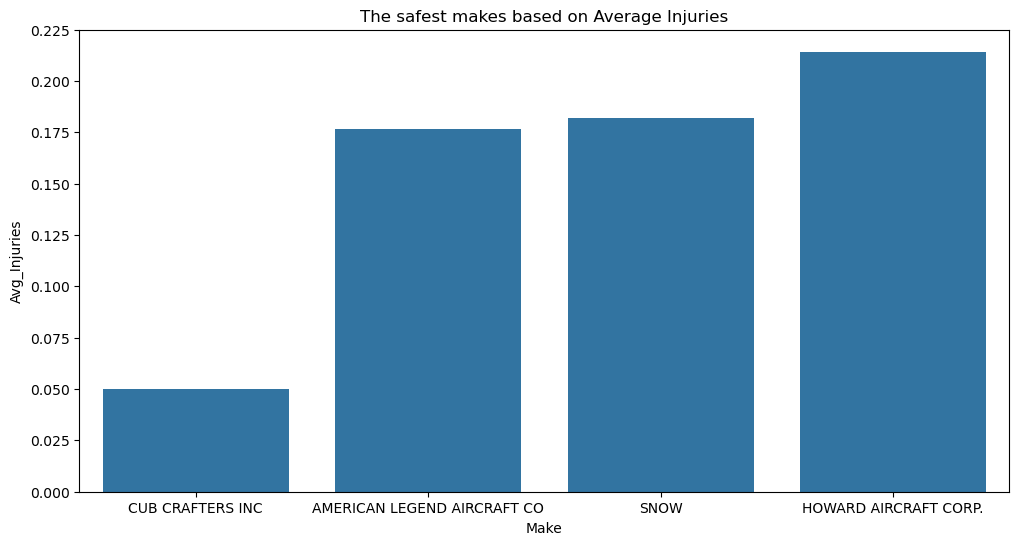

In [294]:
plt.figure(figsize=(12,6))
sns.barplot(data=safe_makes.head(4), x='Make', y='Avg_Injuries')
plt.title('The safest makes based on Average Injuries')
plt.show()

# The safest aircraft models

In [295]:
models_stats = (df.groupby(['Model'])['Total_Injuries'].agg(['mean', 'sum', 'count']).reset_index().rename(columns={'mean': 'Avg_Injuries', 'sum': 'Total_Injuries'}))

safest_models = models_stats[models_stats['count'] >= 10].sort_values(by='Avg_Injuries')

safest_models.head(10)

,Model,Avg_Injuries,Total_Injuries,count
4328,DA 20 C1,0.000000,0,11
1692,777,0.000000,0,43
8002,PA-18A 150,0.000000,0,12
4513,DGA-15P,0.000000,0,12
1627,757-222,0.000000,0,10
1631,757-232,0.000000,0,10
3881,CCX-2000,0.062500,1,16
2521,AT 301,0.083333,1,12
5099,F-1,0.090909,1,11
8033,PA-22/20,0.100000,1,10


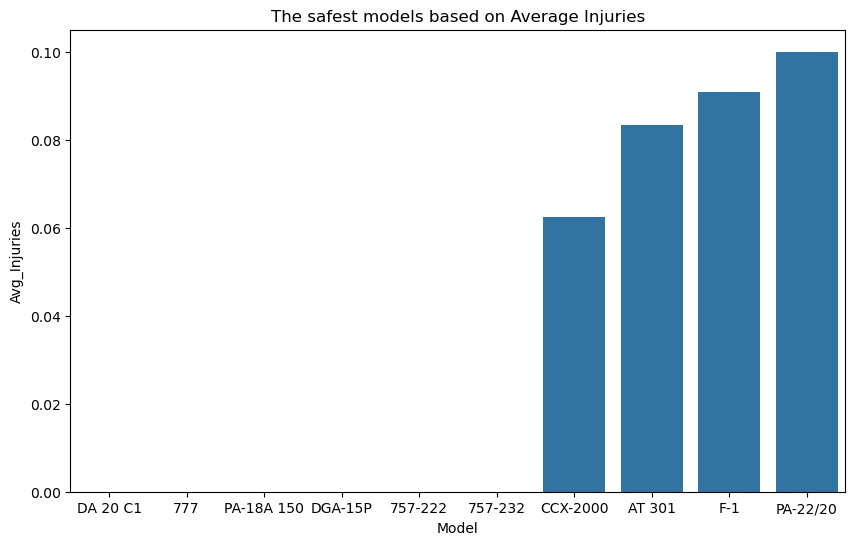

In [296]:
plt.figure(figsize=(10,6))
sns.barplot(data=safest_models.head(10), x='Model', y='Avg_Injuries')
plt.title('The safest models based on Average Injuries')
plt.show()

The safest model is the Boeing 777 model is the safest as it has the lowest average injuries while having a high incident/accident count. It is followed by the Howard DGA-15P and Piper PA-18A 150 models.

# RECOMMENDATIONS

## Top 3 Safest Aircraft Models
1. **Boeing 777**
2. **Howard DGA-15P**
3. **Piper PA-18A 150**

In [297]:
# saving the modified dataframe
safest_models.to_csv(r'C:\Users\user\Modified_Aviation_data.csv')

In [298]:
#saving the modified dataframe
safe_makes.to_csv(r'C:\Users\user\Modified_Aviation_data2.csv')

In [95]:
# saving the dataframe
df.to_csv(r'C:\Users\user\Aviation_data.csv')